In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df = pd.read_csv("import_date.csv", header=0)


In [23]:
df.head()

,Date,Volume
0,01-01-17,4523953.97
1,02-01-17,2650213.80
2,03-01-17,6295053.28
3,04-01-17,4429407.65
4,05-01-17,4603262.53


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Date      36 non-null object
Volume    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [25]:
df['Date'] = pd.to_datetime(df['Date']).dt.date.astype('datetime64[ns]')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Date      36 non-null datetime64[ns]
Volume    36 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [27]:
df.head()

,Date,Volume
0,2017-01-01,4523953.97
1,2017-02-01,2650213.80
2,2017-03-01,6295053.28
3,2017-04-01,4429407.65
4,2017-05-01,4603262.53


In [28]:
y = df.set_index(['Date'])
y.head(5)

,Volume
Date,
2017-01-01,4523953.97
2017-02-01,2650213.80
2017-03-01,6295053.28
2017-04-01,4429407.65
2017-05-01,4603262.53


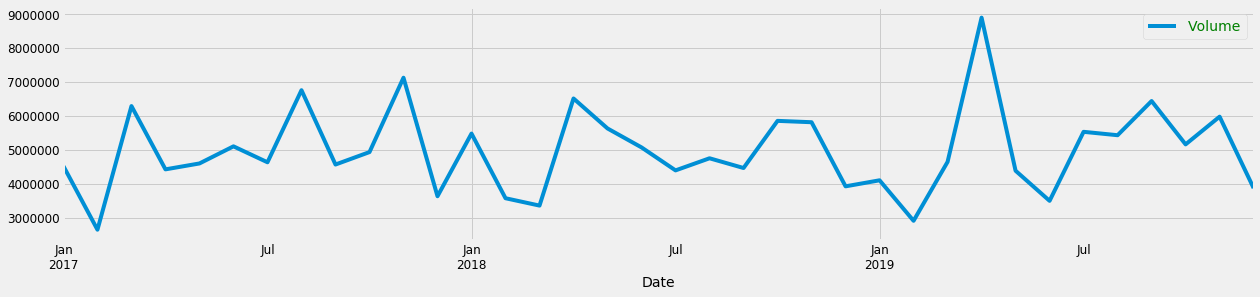

In [29]:
y.plot(figsize=(19, 4))
plt.show()

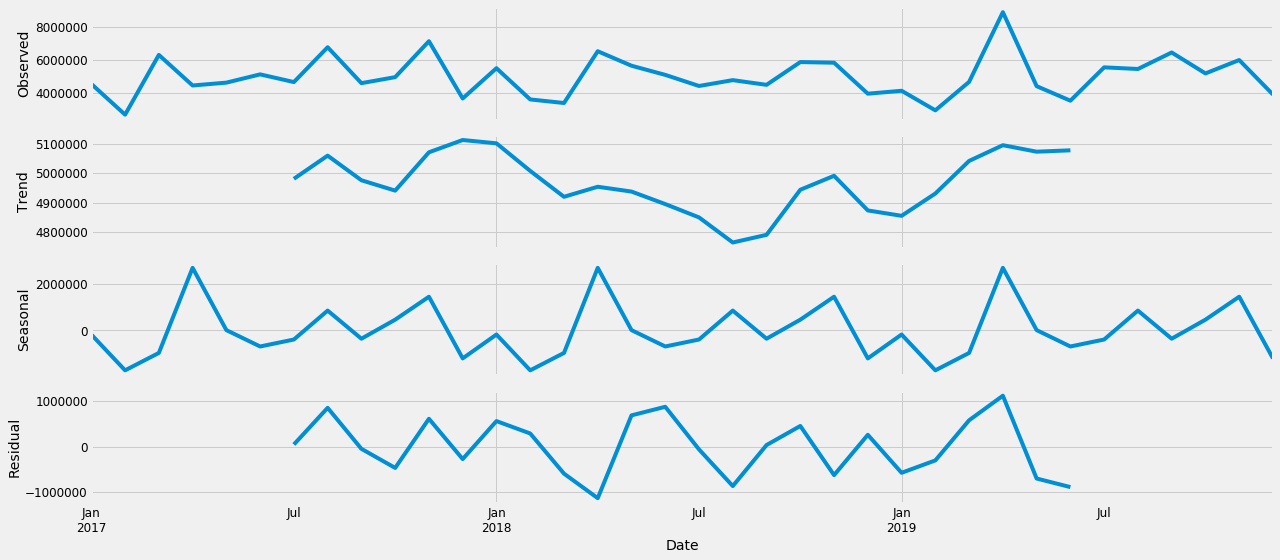

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1183.090267771274
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:718.7982164353872
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:748.8847129049756
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:375.08478952649887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1128.682901161762
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:684.6407820038709
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:793.5440610081907
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:375.6664144428679
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1081.8713174715153
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:708.0182684563907
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:729.4640338237984
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:352.1841300585124
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1027.902121198883
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:656.8881353154588
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:715.7868893565238
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:347.3074969320077
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1114.2592771889053
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:717.8598887548335
ARIMA(1

In [62]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4345      0.200     -2.170      0.030      -0.827      -0.042
sigma2       3.56e+12   1.18e-14   3.02e+26      0.000    3.56e+12    3.56e+12


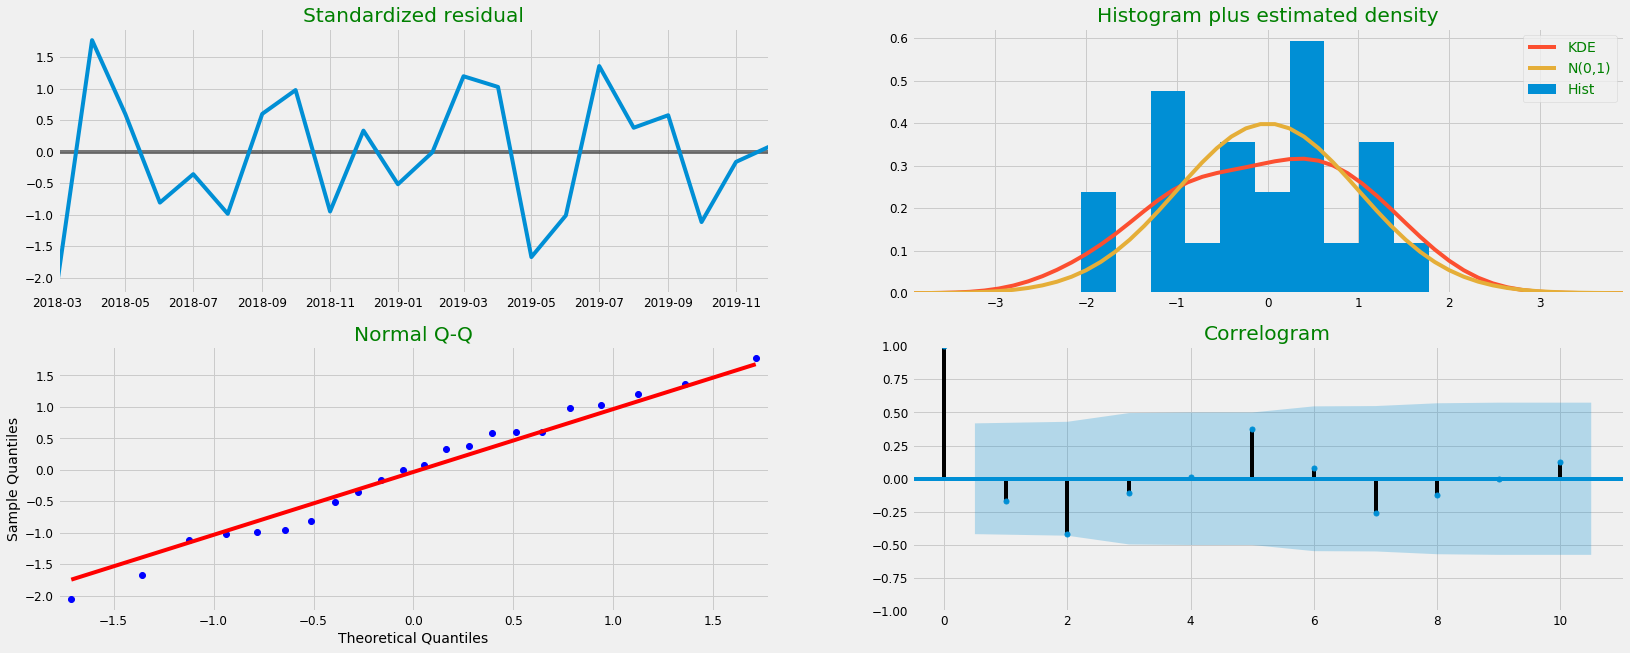

In [63]:
results.plot_diagnostics(figsize=(25, 10))
plt.show()

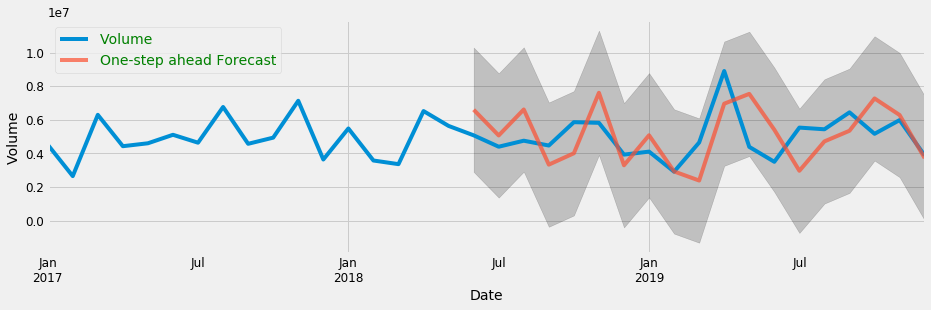

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
y_forecasted = pred.predicted_mean
y_truth = y['2018-06-01':]
mse = mean_squared_error(y_truth , y_forecasted)
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2675918781089.34
The Root Mean Squared Error is 1635823.58


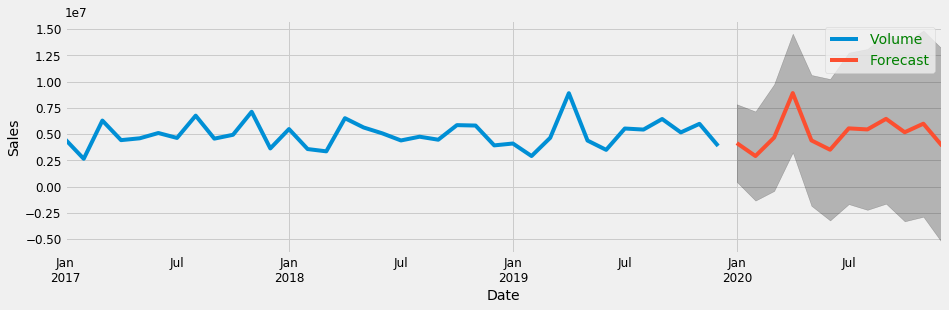

In [66]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [67]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2018-06-01    6.599447e+06
2018-07-01    5.068660e+06
2018-08-01    6.614174e+06
2018-09-01    3.332858e+06
2018-10-01    4.008333e+06
2018-11-01    7.607363e+06
2018-12-01    3.294561e+06
2019-01-01    5.079100e+06
2019-02-01    2.926137e+06
2019-03-01    2.386121e+06
2019-04-01    6.959009e+06
2019-05-01    7.543161e+06
Freq: MS, dtype: float64

In [68]:
y_truth.head(12)

,Volume
Date,
2018-06-01,5076612.01
2018-07-01,4398786.92
2018-08-01,4755979.36
2018-09-01,4469172.76
2018-10-01,5858953.05
2018-11-01,5819006.86
2018-12-01,3928854.27
2019-01-01,4106593.70
2019-02-01,2912513.06


In [69]:
pred_ci.head(24)

,lower Volume,upper Volume
2020-01-01,4.502930e+05,7.846688e+06
2020-02-01,-1.334797e+06,7.162330e+06
2020-03-01,-4.137089e+05,9.751266e+06
2020-04-01,3.256359e+06,1.457230e+07
2020-05-01,-1.830991e+06,1.063758e+07
2020-06-01,-3.225349e+06,1.025403e+07
2020-07-01,-1.668899e+06,1.276836e+07
2020-08-01,-2.214667e+06,1.311348e+07
2020-09-01,-1.629301e+06,1.454372e+07
2020-10-01,-3.307754e+06,1.366690e+07


In [70]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2020-01-01    4.148491e+06
2020-02-01    2.913767e+06
2020-03-01    4.668779e+06
2020-04-01    8.914327e+06
2020-05-01    4.403295e+06
2020-06-01    3.514343e+06
2020-07-01    5.549732e+06
2020-08-01    5.449407e+06
2020-09-01    6.457208e+06
2020-10-01    5.179572e+06
2020-11-01    5.996216e+06
2020-12-01    3.890772e+06
Freq: MS, dtype: float64

In [21]:
forecast.to_csv('SARIMA.csv',index=False)